# Example: Pump Operating Point

A pump with the characteristic curve shown in the accompanying graph is to be installed as shown.  

```{figure} example27-1.png
---
width: 600px
name: example27-1
---
Caption
```

Determine the anticipated discharge in the system?

## Step 1
State the problem, done above! But seriously we need to create a system curve $h_p(Q)$ and superimpose it onto the pump characteristic curve shown to find the operating point.

## Step 2
The sketch is pretty much done for us; so not much to add here.

## Step 3
Knowns: 
- Pool elevations
- Working fluid (water)
- Pipe lengths and diameters, and friction factors (unusual to know these, but we could determine from material properties if needed)
- Pump "location" 
- Fitting types

Unknowns:
- $h_p(Q)$
- $Q$

## Step 4
Governing equations:
- Modified bernoulli: $\frac{p_1}{\gamma}+z_1+\frac{V_1^2}{2g}+h_p(Q) = \frac{p_2}{\gamma}+z_2+\frac{V_2^2}{2g}+\frac{fL}{D}\frac{V^2}{2g}+K_{entrance}\frac{V^2}{2g}+K_{bend}\frac{V^2}{2g}+K_{exit}\frac{V^2}{2g}$
- Darcy-Weisass pipeline loss model:  $h_{pipe loss} = \frac{fL}{D}\frac{V^2}{2g}$
- Continunity: $Q=VA$

## Step 5
Analysis

Using modified bernoulli, observe constant diameter pipes and start and end at each reservoir pool surface so that

$$V_1=V_2$$  

and

$$p_1 = p_2$$

Rearrange what remains into

$$h_p(V) = (z_2 - z_1) + \frac{V^2}{2g}[\frac{fL}{D}+K_{entrance}+K_{bend}+K_{exit}]$$

We will also need to employ continunity to relate $Q$ and $V$ as

$$V = \frac{Q}{(\pi D^2)/4)}$$


In [1]:
def velocity(flow,diameter):
    import math
    velocity = (flow)/(0.25*math.pi*diameter**2)
    return(velocity)

def system_curve(z1,z2,flow,plength,pdiameter,pfriction_factor,k1,k2,k3,gravity):
    lift = (z2-z1)
    velocity_head = (velocity(flow,pdiameter)**2)/(2 * gravity)
    pipe_loss = (pfriction_factor*plength/pdiameter)*velocity_head
    fitting_loss = (k1+k2+k3)*velocity_head
    system_curve = lift+pipe_loss+fitting_loss
    return(system_curve)

def gpm2cfs(flowgpm):
    gpm2cfs = flowgpm/(7.48*60) # 1 cfs = 7.48gal/cf * 60 sec/min
    return(gpm2cfs)

Now use these scripts to make a table of system curve values

In [2]:
flowgpm = [i for i in range(0,3750,250)] # list of flowrates
flowcfs = [0 for i in range (len(flowgpm))] # empty list for conversion
# convert to cfs
for i in range(len(flowgpm)):
    flowcfs[i]=gpm2cfs(flowgpm[i])
addedheads = []
for i in range(len(flowgpm)):
    addedheads.append(system_curve(10,20,flowcfs[i],1000,10./12.,0.020,0.03,0.35,1.0,32.2))
print("--- System Curve Table --- \n Flow (gpm)  Added Head (ft)")
for i in range(len(flowgpm)):
    print(" ",round(flowgpm[i],1),"        ",round(addedheads[i],1))

--- System Curve Table --- 
 Flow (gpm)  Added Head (ft)
  0          10.0
  250          10.4
  500          11.6
  750          13.7
  1000          16.6
  1250          20.3
  1500          24.8
  1750          30.1
  2000          36.3
  2250          43.3
  2500          51.1
  2750          59.7
  3000          69.2
  3250          79.5
  3500          90.6


Now use this table to find operating point from the pump performance curve (draw system curve on the pump curve). 

In [3]:
pumpflow = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,4900]
pumphead = [76,75,74,73,72,70,67,59,50,22,0]

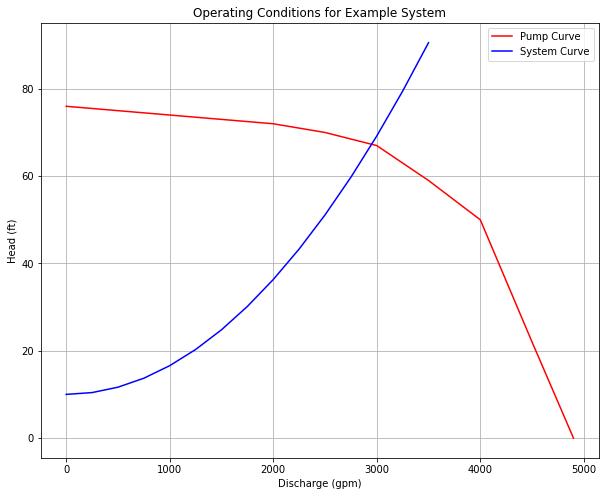

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(pumpflow,pumphead,c="red")
plt.plot(flowgpm,addedheads, c="blue")
plt.legend(["Pump Curve","System Curve"])
plt.title("Operating Conditions for Example System")
plt.xlabel('Discharge (gpm)') 
plt.ylabel('Head (ft)') 
plt.grid(which='both')
plt.show()

## Step 6

We are done, and would report that the operating point is $Q \approx~3000 \text{gpm } @ 70~\text{feet of head}$


## Readings

1. CE-3305-2022-1 Syllabus. [http://54.243.252.9/ce-3305-webroot/0-Syllabus/ce-3305-2022-1-syllabus.html](http://54.243.252.9/ce-3305-webroot/0-Syllabus/ce-3305-2022-1-syllabus.html)

2. Hibbeler, R.C, Fluid Mechanics, 2ed. Prentice Hall, 2018. ISBN: 9780134655413 pp. 569-596

3. DF Elger, BC Williams, Crowe, CT and JA Roberson, *Engineering Fluid Mechanics 10th edition*, John Wiley & Sons, Inc., 2013. [http://54.243.252.9/ce-3305-webroot/3-Readings/EFM-20.pdf](http://54.243.252.9/ce-3305-webroot/3-Readings/EFM-20.pdf)

4. Cleveland, T. G. (2014) *Fluid Mechanics Notes to Accompany CE 3305 at Jade-Holshule (TTU Study Abroad 2015-2019)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering. [missing_link](http://54.243.252.9/ce-3305-webroot/3-Readings/ce3305-lecture13.pdf)

 